# Lab 2: Elementary Statistics, Exploratory Data Analysis, & Statistical Entities in Political Discourse

In this lab you will 
1. learn how to perform some elementary statistics in python
2. and use the python library called `pandas` to examine and explore a data set.

Building off our earlier discussions of data provenance last week and our discussion on Tuesday regarding the relationship between our tools and the articulation of criteria for state formation and individual identity (pace Igo and Desrosieres), we will continue to be mindful of how our tools shape our expectations.    

## Getting Started
Open a webbrowser and type the following address: http://data-ppf.dsi.columbia.edu:8000
. Log in to the Jupyterhub server with your user name and password, open a new notebook, and download this notebook using the wget command:

In [ ]:
!wget data-ppf.github.io/labs/Lab2.ipynb

As was mentioned last lab, you can use any unix command in a jupyter notebook by starting the line with an exclaimation point. 

## A Few Basic Tools for Examining Data
Python provides a number of useful, powerful, and versatile tools for interrogating data. We're going to show you how to use a few of them. But first, to use these tools, we need to tell python to load the code libraries that we need:

In [1]:
import numpy as np

from lab_2 import *
%matplotlib notebook
custom_styling

Note that any line that begins with a hash (`#`) will not be executed in the code block. The `as plt` and `as np` allow us to refer to these libraries in the code as `plt` and `np` rather than `plot` and `numpy` respectively. Let's begin by considering what may be the most famous curve in all of statistics: the bell curve

$$
\varphi (x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}
$$

In [ ]:
age = AnalyticGaussianExplorer()

In [ ]:
print("Distributional mean:", MU)
print("Distributional variance:", SIGMA)
print("Distributional standard deviation:", np.sqrt(SIGMA))

(Class Discussion: what's going on in the code above?)

This curve has many names, including the "normal distribution," the "normal curve," the "normal correlation," the "bell curve," the "gaussian distribution," the "law of deviation," the "normal universe," the "normal population,"  or, today, often simply the "gaussian". It has lots of interesting [mathematical properties](https://en.wikipedia.org/wiki/Normal_distribution), but for our purposes you are free to think of it as one of many useful mathematical objects that tend to crop up frequently in a variety of different contexts.    

Historical Aside: The gaussian distribution takes its name from [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss), however, this particular convention is yet another example of [Stigler's Law](https://en.wikipedia.org/wiki/Stigler%27s_law_of_eponymy) stating that a discovery is never named after the first person to discover it.[1] The name "normal distribution" was made popular by Karl Pearson—who also coined the term "standard deviation"—as a means of dispensing with concerns of discovery "priority," but had the regrettable effect, he noted, "of leading people to believe that all other distributions of frequency are in one sense or another 'abnormal.'"[2] As early as 1733 Abraham De Moivre used this curve, but did not think of the curve as "a probability density function."[3]   


<hr>
<small>
1. Stephen Stigler, "Stigler's Law of Eponymy," <em>Transactions of the New York Academy of Sciences</em> 39, issue 1, series II (1980): 147-157. See also Stigler, <em>Statistics on the Table</em>, Cambridge, MA: Harvard University Press, 1999, 277-290.

2. Theodore Porter, <em>Karl Pearson: The scientific life in a statistical age</em>, Princeton: Princeton University Press, 2004, 237. Karl Pearson, "Notes on the History of Correlation," <em>Biometrika</em> 13, no 1, (1920): 25.

3. Stephen Stigler, <em>The History of Statistics</em>, Cambridge, MA: Harvard University Press, 1986, 76.  
</small>

In general, you're rarely (if ever!) see a perfect gaussian in observational data. Instead you'll see stuff like this:

In [ ]:
nge = NumericalGaussianExplorer()

In [ ]:
# a sample of 100 observations drawn from the gaussian distribution
# with parameters mean=mu and var=sigma as before
nge.display_sample()

This is an array of simulated data--i.e., the data has explicitly been sampled randomly from a gaussian distribution to "simulate" observational data. 

The `numpy.array` above is very similar to the python `list` discussed in the previous lab. (This format allows calculations to be performed more quickly.) Numpy provides lots of handy functions to deal with data like this.

In [ ]:
print('The minimum of the sample is', np.min(nge.sample))
print('The maximum of the sample is', np.max(nge.sample))
print('The mean (one type of average) of the sample is', np.mean(nge.sample))
print('The median (another type of average) of the sample is', np.median(nge.sample))
print('The standard deviation of the sample is', np.std(nge.sample))

For a gaussian curve, one standard deviation (std) away from mean is 34.1%; two std away from mean is 47.7%.

Instead of "manually" calculating all the statistics of the sample, we can also ask [`pandas`](https://pandas.pydata.org/) (the python package, not the fluffy animal) to summarize it for us.

In [ ]:
nge.display_statistics()
# behind the scenes, this is
# pd.DataFrame(nge.sample).describe()

We can plot this data such that the x-axis is the element of array and the y-axis is the value of the element... and sort the elements by size...

In [ ]:
nge.display_graph()

 We can also produce a histogram of this data:

Importantly, changing the number of bins that you use in a historgram will change how well the data appears to fit the a curve. What number of bins makes the data appear to fit the curve the best? Is this a "reasonable" number of bins? (This second question is dependent on the context of the data and your particular question.)  

Likewise, having more data can make it easier to see patterns. To show this, we can play around with the number of observations in our sample (aka our "sample size"). How does the binning of the histogram for this new data set affect the "credibility" of the claim that the data is a gaussian distribution?   

In [ ]:
ge = GaussianExplorer()

Finally we can also easily generate a box plot (sometimes called a "box and whiskers" plot). Using our 100 observations from earlier, we get the following graph: 

HBox(children=(IntSlider(value=100, description='Sample Size', max=10000, min=100, step=100),), layout=Layout(justify_content='center'))

<IPython.core.display.Javascript object>


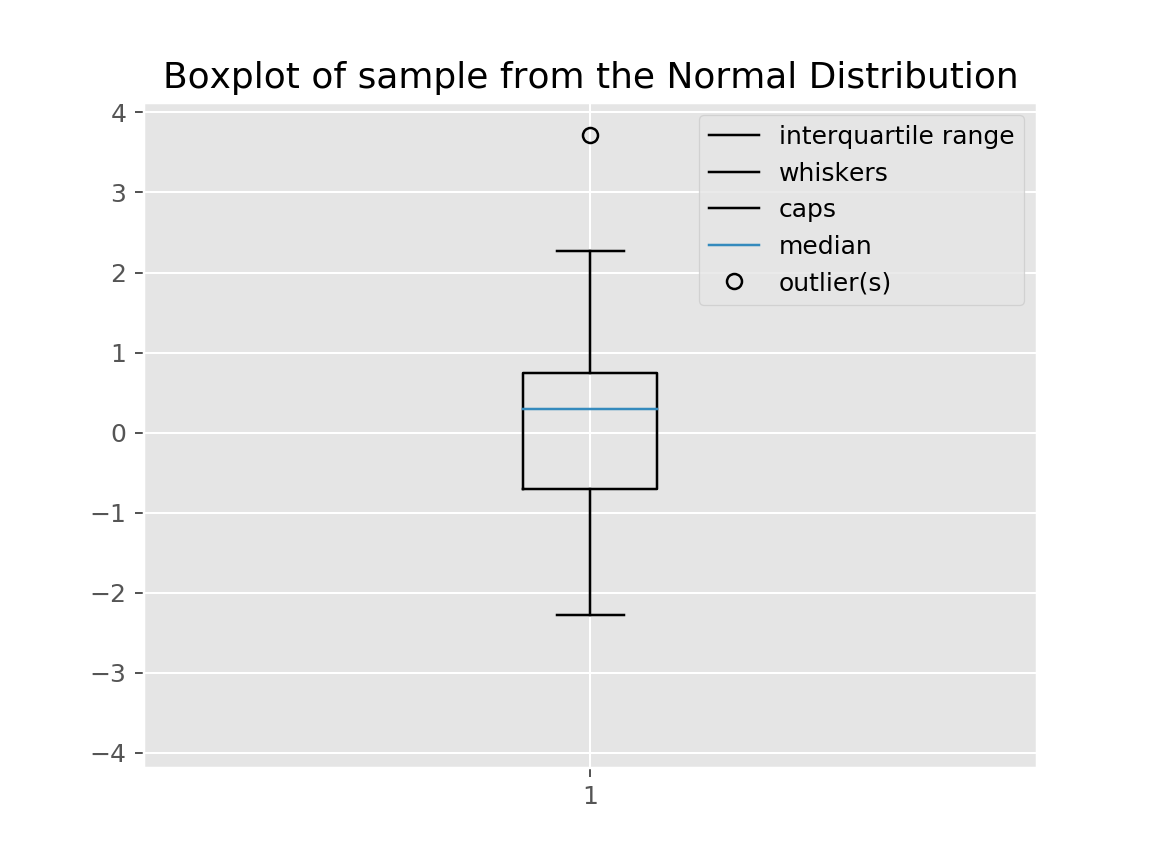

In [2]:
gbe = GaussianBoxplotExplorer()

While the blue line denotes the median and the top and bottom of the box denote the first and third quartiles, the horizontal lines at the ends of the "whiskers" can mean different things (see [Wikipedia's box plot](https://en.wikipedia.org/wiki/Box_plot) for a partial list). The box itself is composed of an "interquartile region," denoted IQR, defined as range between quartile 3 and quartile 1, and the default for matplotlib sets the "whiskers" equal to 1.5(IQR). Refer to the documentation for the [boxplot function](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot) to learn about the various whisker options.        
 



## Exploring Data
Now lets get some data to explore. Alain Desrosieres argues that the central tension in histories examining the roles of statistics in political discourse is that the statistical entities that statistics uses are both real and fabrications: real in that they must be taken as “uncontestable standards” of reference insofar as they serve as  compelling evidence for a particular claim; fabrications in that they are the result of “the provisional and fragile crowning of a series of conventions of equivalence between entities.”[1] The statistical entity of life expectancy, for instance, is real insofar as it serves as a proxy for the health of populations and individuals, and is used to justify disparities in health and life insurance pricing and coverage for different populations. Yet in calculating life expectancy, one quickly discovers not a single computational method, but hundreds—each with a different set of assumptions that yield different results. Deciding which life expectancy estimation to employ is tied up with what the measure will be used to do, and so involves political, ethical, and even moral decisions about who and what should be counted and excluded.[2] Tracing the historical transformation of a statistical entity from a contingent, context-sensitive description into a “universal” property provides insight into the political institutions that created it while also making legible the ways in which a statistical entity exerted a reciprocal pressure back upon the institutions and individuals that created them.[3] Exploring the political implications of statistical entities is further complicated by their historical tendency to be repurposed for use in new arguments. While life expectancy was first developed for assigning and categorizing individuals according to their likelihood of death while their life insurance policy was in force, this statistical category was subsequently put to more sinister purposes: namely, to “demonstrate” the existence of racial biological characteristics and then to serve as “evidence” that race was an appropriate category for screening immigrants.[4]

<b>*Our immediate purpose here is to get some practice using Pandas to explore a data set.*</b>

<hr/>
<small>
1. Alain Desrosieres, <em>The Politics of Large Numbers: A History of Statistical Reasoning</em>, Cambridge, MA: Harvard University Press, 1998, 324-325.

2. Desrosieres, <em>The Politics of Large Numbers</em>, 325.

3. Desrosieres, <em>The Politics of Large Numbers</em>, 324.

4. Dan Bouk, <em>How Our Days Became Numbered: Risk and the Rise of the Statistical Individual</em>, Chicago, IL: University of Chicago Press, 187-188, 201-202.
</small>

Let's start by downloading data about life expectancy.

In [ ]:
!wget data-ppf.github.io/labs/life.expectancy.countries.csv

Note that the name of the file will be listed above with the phrase "'[file name]' saved". Now check to make sure you have it by typing

In [ ]:
!ls

Sometimes the name is changed when you download the file. We can rename this file as follows with the "mv" command. Replace [file name] below with the name of the file you downloaded. 

In [ ]:
! mv [file name] life.expectancy.countries.csv

This data was obtained from here: http://apps.who.int/gho/data/node.main.688. As we did in lab 1, you can learn more about the assumptions of the data by examining the information provided there. 

We can look at the actual text of this csv file using the "cat" command:

In [ ]:
!cat life.expectancy.countries.csv

Note that csv stands for "comma separated values," but, in practice, the values in a file can be separated by any character, including commas, semi-colons, and tabs. We can use the pandas library to explore this data.   

In [ ]:
import pandas as pd
lifeexpectancy = pd.read_csv("life.expectancy.countries.csv")

We can then easily list this data by just calling the variable we assigned it to:

In [ ]:
lifeexpectancy

Pandas attempts to automatically format the data, but the data itself may not always be in a format that pandas can interpret correctly. In the case above, we can see that row 0 is really part of the data label and is not data itself. Note that the data gives the life expectancy for different countries (column 1) and different years (column 2), as well as for different "sexes" and ages "at birth" and "age 60". We can fix the header row (i.e., the row with column labels) in the following way:

In [ ]:
# rename header labels
lifeexpectancy.columns = ["country", "year", "life expectancy at birth (both sexes)", \
                          "life expectancy at birth (female)", "life expectancy at birth (male)", \
                          "life expectancy at age 60 (both sexes)", "life expectancy at age 60 (female)", \
                          "life expectancy at age 60 (male)"]

# remove row 0 with header info from lifeexpectancy dataframe
lifeexpectancy.drop(lifeexpectancy.index[[0]]) 


To figure out how many rows we have, we can use "index":

In [ ]:
lifeexpectancy.index

So we have 2940 rows. To pick out individual rows from this data, we can use what is called a slice in python. To wit, to output rows 2, 3, and 4, we write the following:

In [ ]:
lifeexpectancy[2:5]

We can also use the call "describe" to tell us information about these three rows by individual column:

In [ ]:
lifeexpectancy[2:5].describe()

In [ ]:
lifeexpectancy.groupby('country').describe()

Let's say we want to plot the life expectancy for 6 countries from 2000 to 2014. How do we do it? Note that

<code> lifeexpectancy[1:16]["life expectancy at birth (both sexes)"] </code>

means takes rows 1-16 and the column "life expectancy at birth (both sexes)". If we don't specific rows, it will return all rows that meet criteria.

In [ ]:
# get rows for the 5 countries we are examining
Afghanistan = lifeexpectancy[lifeexpectancy['country']=='Afghanistan']
Zambia = lifeexpectancy[lifeexpectancy['country']=='Zambia']
United_States = lifeexpectancy[lifeexpectancy['country']=='United States of America']
France = lifeexpectancy[lifeexpectancy['country']=='France']
Iceland = lifeexpectancy[lifeexpectancy['country']=='Iceland']
Sudan = lifeexpectancy[lifeexpectancy['country']=='Sudan']

#get life expectancy at birth
France_values = France["life expectancy at birth (both sexes)"].values.astype(float)
Afghanistan_values = Afghanistan["life expectancy at birth (both sexes)"].values.astype(float)
US_values = United_States["life expectancy at birth (both sexes)"].values.astype(float)
Zambia_values = Zambia["life expectancy at birth (both sexes)"].values.astype(float)
Iceland_values = Iceland["life expectancy at birth (both sexes)"].values.astype(float)
Sudan_values = Sudan["life expectancy at birth (both sexes)"].values.astype(float)

#years for x-axis
years = Afghanistan["year"].values.astype(float)

#plot different countries
plt.plot(years, Afghanistan_values, color = "black")
plt.plot(years, France_values, color = "green")
plt.plot(years, US_values, color = "blue")
plt.plot(years, Zambia_values, color = "red")
plt.plot(years, Iceland_values, color = "purple")
plt.plot(years, Sudan_values, color = "yellow")

plt.show()

In [ ]:
# Other useful pandas commands:

# 1. How find a column that contains a key or keywords ---
Example1 = lifeexpectancy[lifeexpectancy.country.isin(['A term you wish to find', 'a second term'])]
